In [1]:
from sympy import *
init_printing()
t = symbols('t')
I131, Xe131, Xe131m = symbols([r'^{131}I', r'^{131}Xe', r'^{131*}Xe'], cls=Function)
T_I131, T_Xe131m = symbols('T_I131, T_Xe131m')
lambda_I131, lambda_Xe131, lambda_Xe131m = symbols([r'\lambda_{^{131}\mathrm{I}}', r'\lambda_{^{131}\mathrm{Xe}}', r'\lambda_{^{131*}\mathrm{Xe}}'])
gamma_I131_Xe131, gamma_I131_Xe131m, gamma_Xe131m_Xe131 = symbols([r'\gamma_{^{131}\mathrm{I}\rightarrow^{131}\mathrm{Xe}}', r'\gamma_{^{131}\mathrm{I}\rightarrow^{131*}\mathrm{Xe}}', r'\gamma_{^{131*}\mathrm{Xe}\rightarrow^{131}\mathrm{Xe}}'])

In [2]:
from sympy.physics.units import days, seconds
values = {
    T_I131: 8.0197*days,
    T_Xe131m: 11.84*days,
    lambda_I131: log(2.)*seconds/T_I131,
    lambda_Xe131: 0,
    lambda_Xe131m: log(2.)*seconds/T_Xe131m,
    gamma_I131_Xe131: 0.89,
    gamma_I131_Xe131m: 0.11,
    gamma_Xe131m_Xe131: 1,
}
var_names = {
    I131: "I131",
    Xe131: "Xe131",
    Xe131m: "Xe131m",
}

In [3]:
system = Tuple(
    Eq(I131(t).diff(t), -lambda_I131*I131(t)),
    Eq(Xe131(t).diff(t), -lambda_Xe131*Xe131(t) + lambda_I131*gamma_I131_Xe131*I131(t) + lambda_Xe131m*gamma_Xe131m_Xe131*Xe131m(t)),
    Eq(Xe131m(t).diff(t), -lambda_Xe131m*Xe131m(t) + lambda_I131*gamma_I131_Xe131m*I131(t)),
)

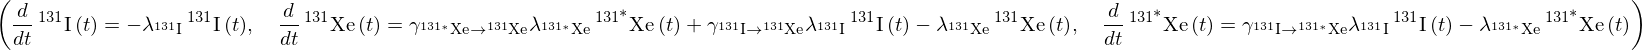

In [4]:
system

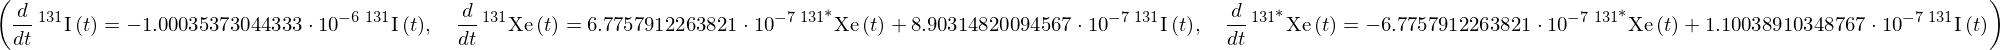

In [5]:
nsystem = system.subs(values).subs(values)
nsystem

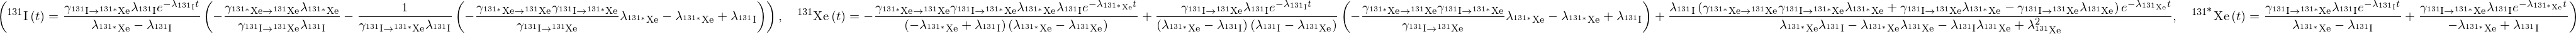

In [6]:
sols = Tuple(*dsolve(system, [I131(t), Xe131(t), Xe131m(t)], ics={I131(0):1, Xe131(0): 0, Xe131m(0): 0}))
sols

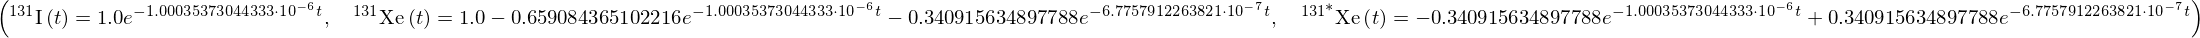

In [7]:
nsols = Tuple(*dsolve(nsystem, [I131(t), Xe131(t), Xe131m(t)], ics={I131(0):1, Xe131(0): 0, Xe131m(0): 0}))
nsols

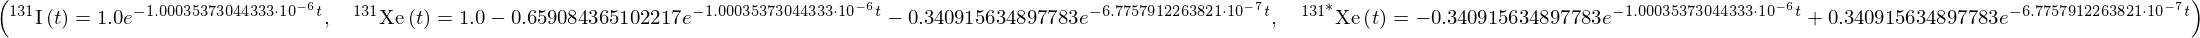

In [8]:
sols.subs(values).subs(values)

In [9]:
for sol in nsols:
    print(ccode(sol.rhs, assign_to=var_names[sol.lhs.func]))

I131 = 1.0*exp(-1.00035373044333e-6*t);
Xe131 = 1.0 - 0.659084365102216*exp(-1.00035373044333e-6*t) - 0.340915634897788*exp(-6.7757912263821e-7*t);
Xe131m = -0.340915634897788*exp(-1.00035373044333e-6*t) + 0.340915634897788*exp(-6.7757912263821e-7*t);


In [10]:
def optimize(expr):
    return expr.replace(exp, lambda x: 2**(x/log(2.))).subs(1.0, 1)

In [11]:
for sol in nsols:
    sol = optimize(sol)
    print(ccode(sol.rhs, assign_to=var_names[sol.lhs.func]))

I131 = pow(2, -1.44320536604537e-6*t);
Xe131 = 1.0 - 0.659084365102216*pow(2, -1.44320536604537e-6*t) - 0.340915634897788*pow(2, -9.7754004004004e-7*t);
Xe131m = -0.340915634897788*pow(2, -1.44320536604537e-6*t) + 0.340915634897788*pow(2, -9.7754004004004e-7*t);


In [52]:
nsols[0]

In [53]:
optimize(nsols[0])